## 01. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans  # here you import the kmeans algorithm from scikit-learn
import pylab as pl  # PyLab is a convenience module that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler # For scaling data to use in cluster analysis


## 02. Create file path

In [4]:
# Turn main project folder into path

path = r"C:\Users\alope\Downloads\Case Study AirBnB - 6.3\Case Study AirBnB"

In [5]:
# Check output

path

'C:\\Users\\alope\\Downloads\\Case Study AirBnB - 6.3\\Case Study AirBnB'

## 03. Import dataset

In [7]:
# Import NY AirBnB files

listings = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'listings_cleaned_MachineLearning.pkl'))

In [8]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [9]:
# Check output
listings.shape

(832809, 51)

In [10]:
listings.head()

,id,host_id,reviews_in_last_year,host_since,host_response_time,host_response_rate,host_acceptance_rate,superhost,host_listings_count,neighborhood,borough,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date
0,2595,2845,0,2008-09-09,72.0,43.0,21.0,f,7.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,0.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,f,3,3,0,0,0.28,2595,2009-11-21
1,2595,2845,0,2008-09-09,72.0,43.0,21.0,f,7.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,0.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,f,3,3,0,0,0.28,2595,2009-12-05
2,2595,2845,0,2008-09-09,72.0,43.0,21.0,f,7.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,0.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,f,3,3,0,0,0.28,2595,2009-12-10
3,2595,2845,0,2008-09-09,72.0,43.0,21.0,f,7.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,0.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,f,3,3,0,0,0.28,2595,2010-04-09
4,2595,2845,0,2008-09-09,72.0,43.0,21.0,f,7.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,0.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.4,f,3,3,0,0,0.28,2595,2010-05-25


## 04. Prepare Data for analysis

### Create a df of only numerical columns within listings

In [13]:
# Create a df of only numerical columns from listings
numerical_columns = listings.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.extend(['latitude', 'longitude'])

numerical_df = listings[numerical_columns]

In [14]:
# Check output
numerical_df.head()

,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude,longitude
0,0,72.0,43.0,21.0,7.0,40.75356,-73.98559,1,1.0,0.0,394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,4.68,4.73,4.63,4.77,4.8,4.81,4.4,3,3,0,0,0.28,40.75356,-73.98559
1,0,72.0,43.0,21.0,7.0,40.75356,-73.98559,1,1.0,0.0,394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,4.68,4.73,4.63,4.77,4.8,4.81,4.4,3,3,0,0,0.28,40.75356,-73.98559
2,0,72.0,43.0,21.0,7.0,40.75356,-73.98559,1,1.0,0.0,394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,4.68,4.73,4.63,4.77,4.8,4.81,4.4,3,3,0,0,0.28,40.75356,-73.98559
3,0,72.0,43.0,21.0,7.0,40.75356,-73.98559,1,1.0,0.0,394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,4.68,4.73,4.63,4.77,4.8,4.81,4.4,3,3,0,0,0.28,40.75356,-73.98559
4,0,72.0,43.0,21.0,7.0,40.75356,-73.98559,1,1.0,0.0,394.97,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,13,30,60,300,49,0,4.68,4.73,4.63,4.77,4.8,4.81,4.4,3,3,0,0,0.28,40.75356,-73.98559


In [15]:
numerical_df.shape

(832809, 39)

## 05. Elbow technique

### Standardize data

In [18]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numerical_df)

# Convert the scaled data back to a DataFrame for easier use
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Use scaled_df for further analysis
scaled_df.head()  # This will show the first few rows of your scaled data

,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude,longitude
0,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
1,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
2,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
3,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
4,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438


In [19]:
# Fit and transform the data
scaled_data = scaler.fit_transform(numerical_df)

In [20]:
# Convert the scaled data back to a DataFrame for easier use
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

In [21]:
# Use scaled_df for further analysis
scaled_df.head()

,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude,longitude
0,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
1,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
2,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
3,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438
4,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438


In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-32479550.99999824,
 -29945826.580490503,
 -28210161.654809922,
 -26545323.74983242,
 -25298241.697609484,
 -23392719.790301554,
 -22274379.668994956,
 -20599212.062514022,
 -19691542.014680233]

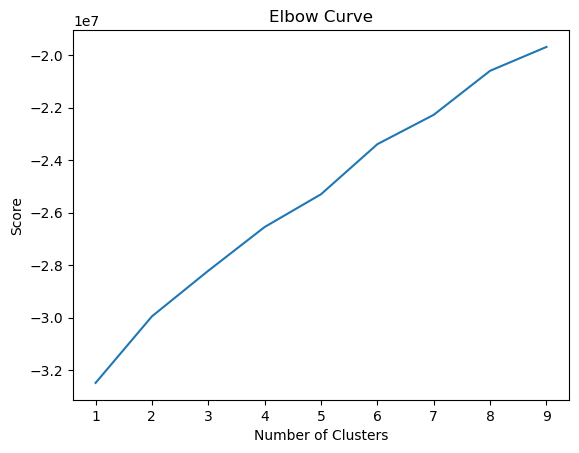

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

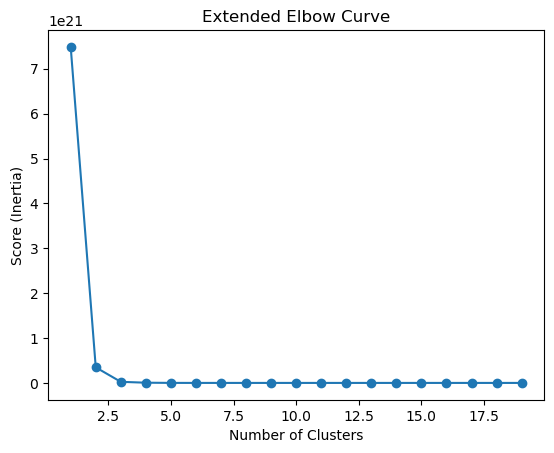

In [25]:
# Create an empty list to store the scores
scores = []

# Range of clusters to test (extend this as needed)
cluster_range = range(1, 20)

# Fit the KMeans model for each number of clusters and calculate the inertia (sum of squared distances)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_df)  # Replace 'numerical_df' with your dataset
    scores.append(kmeans.inertia_)

# Plot the extended elbow curve
plt.plot(cluster_range, scores, marker='o')
plt.title('Extended Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Inertia)')
plt.show()

## 06. k-means clustering

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [28]:
# Fit the k-means object to the data.

kmeans.fit(scaled_df)

C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

### Add 'clusters' column to numerical_df

In [30]:
scaled_df['clusters'] = kmeans.fit_predict(scaled_df)

C:\Users\alope\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
scaled_df.head()

,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude,longitude,clusters
0,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438,2
1,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438,2
2,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438,2
3,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438,2
4,-0.366505,4.651675,-2.859254,-3.434417,-0.006817,0.572416,-0.759438,-1.02738,-0.297225,-1.598106,1.270001,0.304279,0.026992,0.32264,0.209945,0.017998,-0.033395,0.279562,-0.031537,0.224302,0.187726,0.538413,0.900054,-0.665858,-0.366505,-0.509921,-0.55804,-0.543245,-0.773334,-0.478558,0.297932,-1.674544,-0.109181,0.019174,-0.193522,-0.131012,-0.561017,0.572416,-0.759438,2


In [32]:
scaled_df.tail()

,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude,longitude,clusters
832804,-0.348360,-0.434236,0.37955,0.546843,0.549485,-1.715564,-1.527346,-0.506009,-0.297225,-1.598106,-0.370590,-0.998929,-0.023007,-1.002882,-0.769119,0.017998,-0.033395,-0.928771,-0.031537,1.515738,1.445677,1.388721,0.644289,-0.958713,-0.348360,1.155934,1.026198,1.071293,0.872514,0.803557,1.257055,1.412051,2.117392,2.880947,-0.038351,-0.131012,-0.384839,-1.715564,-1.527346,2
832805,-0.312069,-0.434236,0.37955,0.546843,0.549485,-1.715564,-1.527346,-0.506009,-0.297225,-1.598106,-0.279097,-0.998929,-0.023007,-1.002882,-0.769119,0.017998,-0.033395,-0.928771,-0.031537,1.343547,1.355823,1.327985,1.379614,-0.946510,-0.312069,-0.561979,-0.910092,1.071293,0.872514,-3.491530,-0.408790,-0.285576,2.117392,2.880947,-0.038351,-0.131012,0.104545,-1.715564,-1.527346,1
832806,-0.312069,-0.434236,0.37955,0.546843,0.549485,-1.715564,-1.527346,-0.506009,-0.297225,-1.598106,-0.279097,-0.998929,-0.023007,-1.002882,-0.769119,0.017998,-0.033395,-0.928771,-0.031537,1.343547,1.355823,1.327985,1.379614,-0.946510,-0.312069,-0.561979,-0.910092,1.071293,0.872514,-3.491530,-0.408790,-0.285576,2.117392,2.880947,-0.038351,-0.131012,0.104545,-1.715564,-1.527346,1
832807,-0.312069,-0.434236,0.37955,0.546843,0.549485,-1.715564,-1.527346,-0.506009,-0.297225,-1.598106,-0.279097,-0.998929,-0.023007,-1.002882,-0.769119,0.017998,-0.033395,-0.928771,-0.031537,1.343547,1.355823,1.327985,1.379614,-0.946510,-0.312069,-0.561979,-0.910092,1.071293,0.872514,-3.491530,-0.408790,-0.285576,2.117392,2.880947,-0.038351,-0.131012,0.104545,-1.715564,-1.527346,1
832808,-0.348360,-0.434236,0.37955,0.546843,0.549485,-1.715564,-1.527346,0.536733,-0.297225,-1.598106,-0.248600,-0.998929,-0.007679,-1.002882,-0.804085,0.017998,-0.033395,-0.954299,-0.031537,0.138206,0.277580,0.599150,1.187790,-0.958713,-0.348360,1.155934,1.026198,1.071293,0.872514,0.803557,1.257055,1.412051,2.117392,2.880947,-0.038351,-0.131012,-0.384839,-1.715564,-1.527346,0


In [33]:
# Show unique values and their counts from the 'clusters' column
value_counts = scaled_df['clusters'].value_counts()

# Print the result
print(value_counts)

clusters
0    484790
2    237750
1    110268
3         1
Name: count, dtype: int64


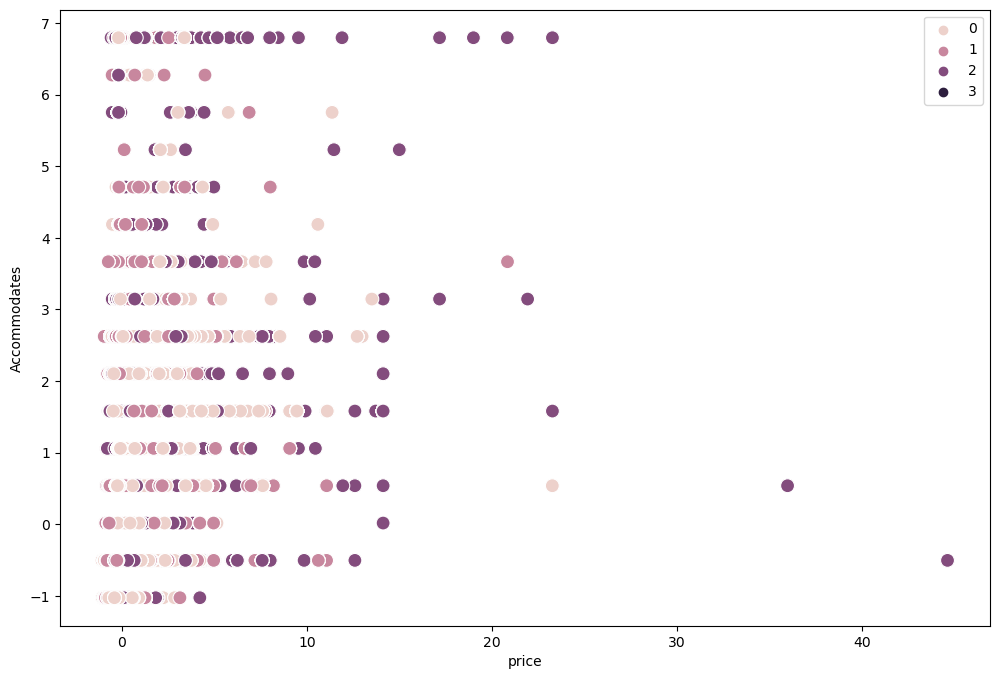

In [34]:
# Plot the clusters for Bathrooms and Price variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['price'], y=scaled_df['accommodates'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.


ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('Accommodates') # Label y-axis.
plt.show()

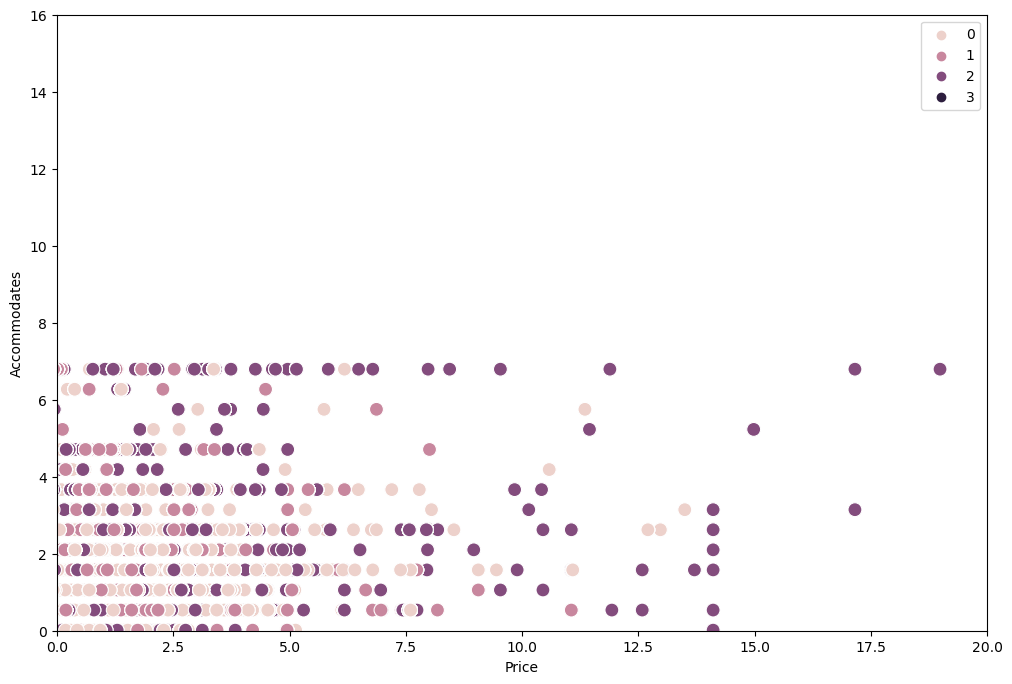

In [35]:
plt.figure(figsize=(12,8))

# Scatter plot with limits
ax = sns.scatterplot(x=scaled_df['price'], y=scaled_df['accommodates'], hue=kmeans.labels_, s=100)

# Set x-axis limit to 3000
plt.xlim(0, 20)

# Set y-axis limit to 20
plt.ylim(0, 16)

# Customizing labels and grid
ax.grid(False)  # Removes the grid from the background.
plt.xlabel('Price')  # Label x-axis.
plt.ylabel('Accommodates')  # Label y-axis.

# Show the plot
plt.show()


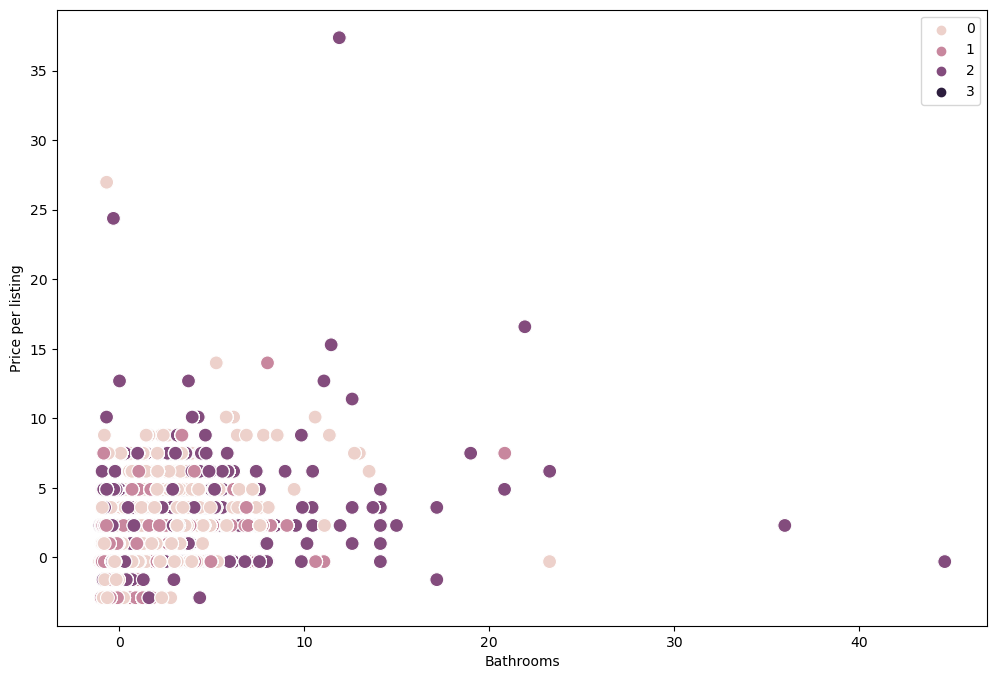

In [36]:
# Plot the clusters for Bathrooms and Price variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['price'], y=scaled_df['bathrooms'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bathrooms') # Label x-axis.
plt.ylabel('Price per listing') # Label y-axis.
plt.show()

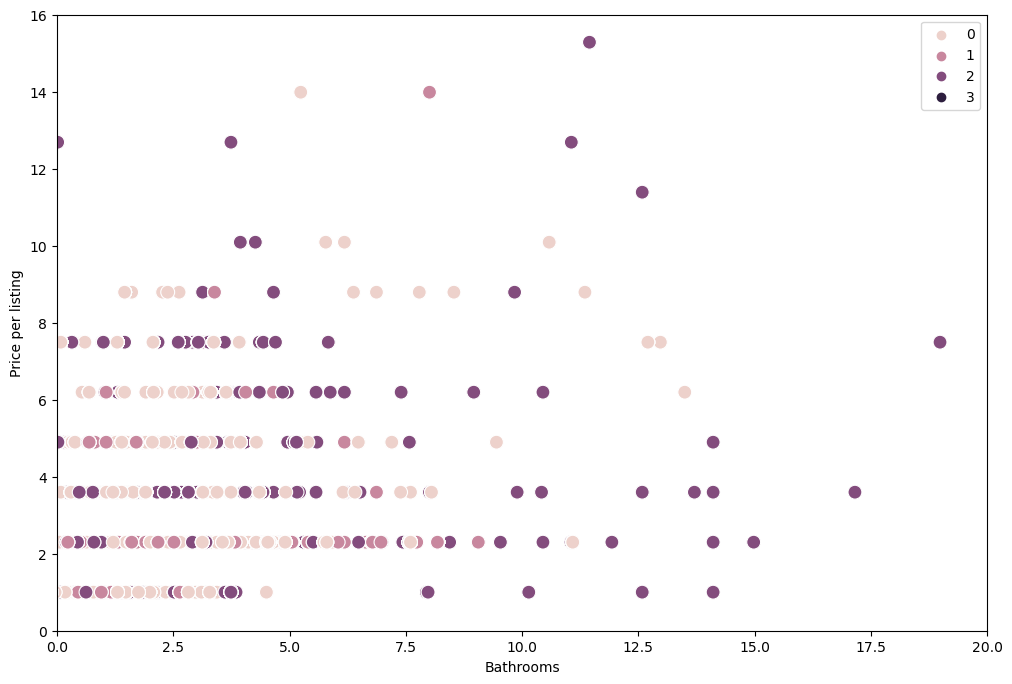

In [37]:
# Plot the clusters for Bathrooms and Price variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['price'], y=scaled_df['bathrooms'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
# Set x-axis limit to 3000
plt.xlim(0, 20)

# Set y-axis limit to 20
plt.ylim(0, 16)


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bathrooms') # Label x-axis.
plt.ylabel('Price per listing') # Label y-axis.
plt.show()

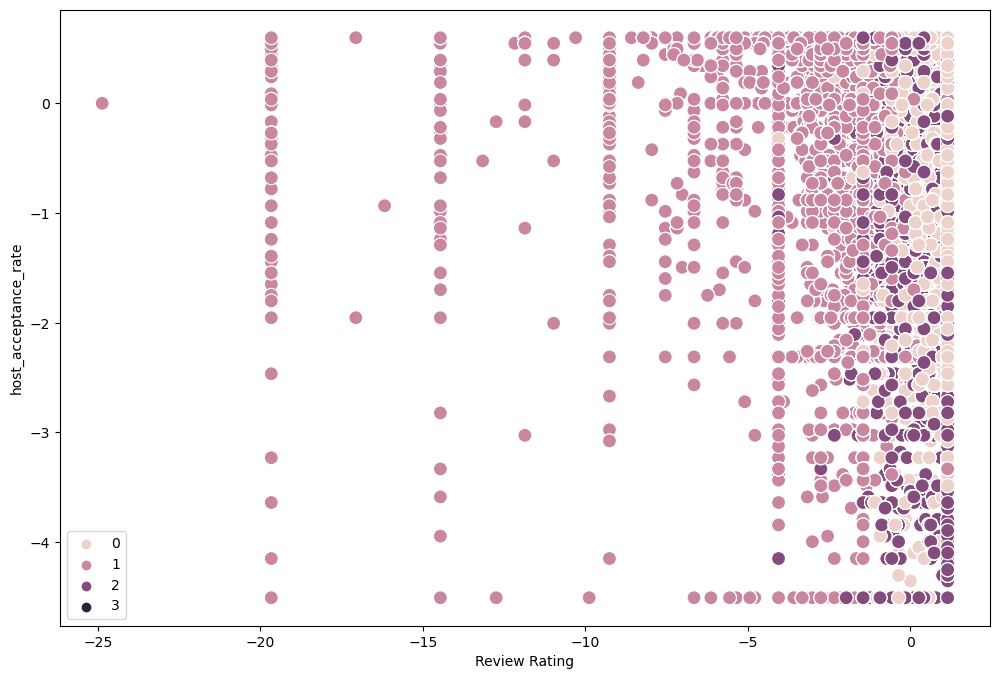

In [38]:
# Plot the clusters for the Review Rating Score and Host Acceptance Rate variable

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['review_scores_rating'], y=scaled_df['host_acceptance_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Rating') # Label x-axis.
plt.ylabel('host_acceptance_rate') # Label y-axis.
plt.show()

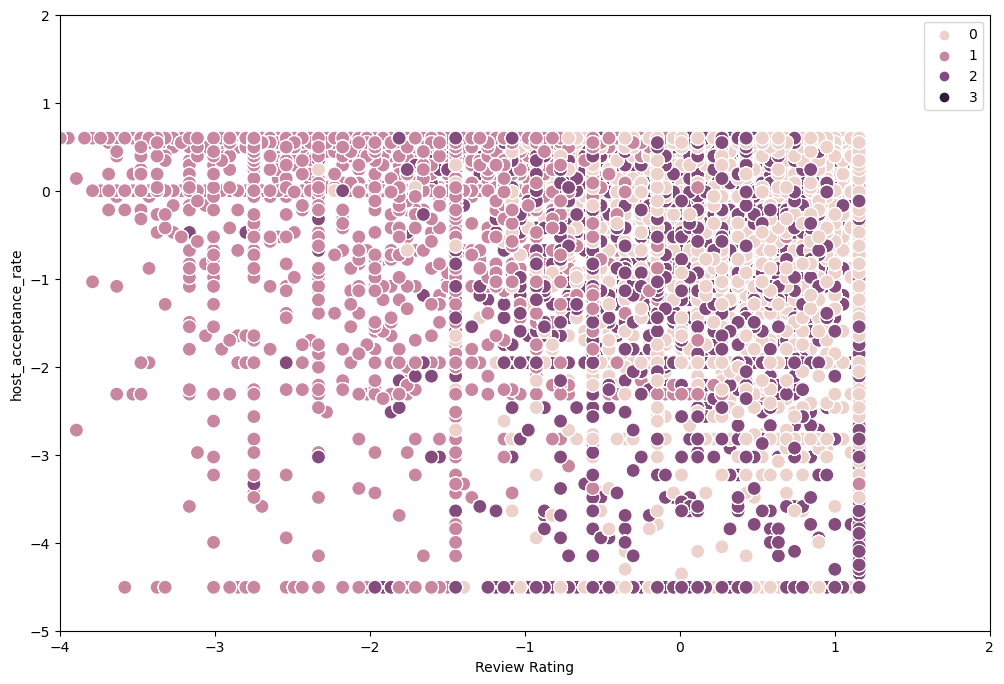

In [39]:
# Plot the clusters for the Review Rating Score and Host Acceptance Rate variable

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['review_scores_rating'], y=scaled_df['host_acceptance_rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.xlim(-4, 2)

# Set y-axis limit to 20
plt.ylim(-5, 2)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Rating') # Label x-axis.
plt.ylabel('host_acceptance_rate') # Label y-axis.
plt.show()

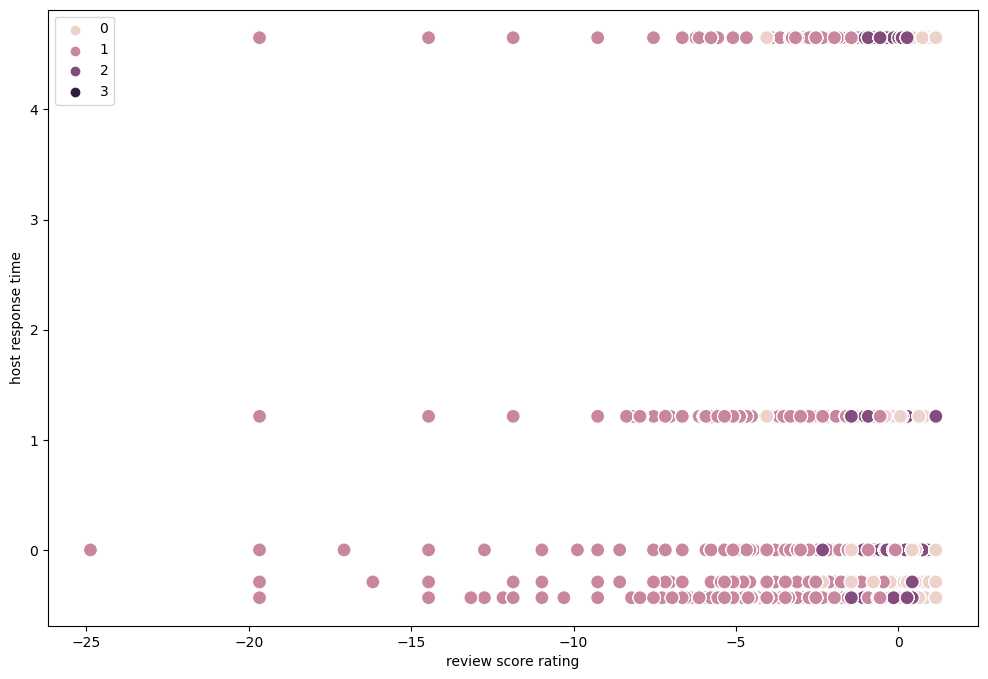

In [40]:
# Plot the clusters for the Review Rating Score and Host Acceptance Rate variable

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['review_scores_rating'], y=scaled_df['host_response_time'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review score rating') # Label x-axis.
plt.ylabel('host response time') # Label y-axis.
plt.show()

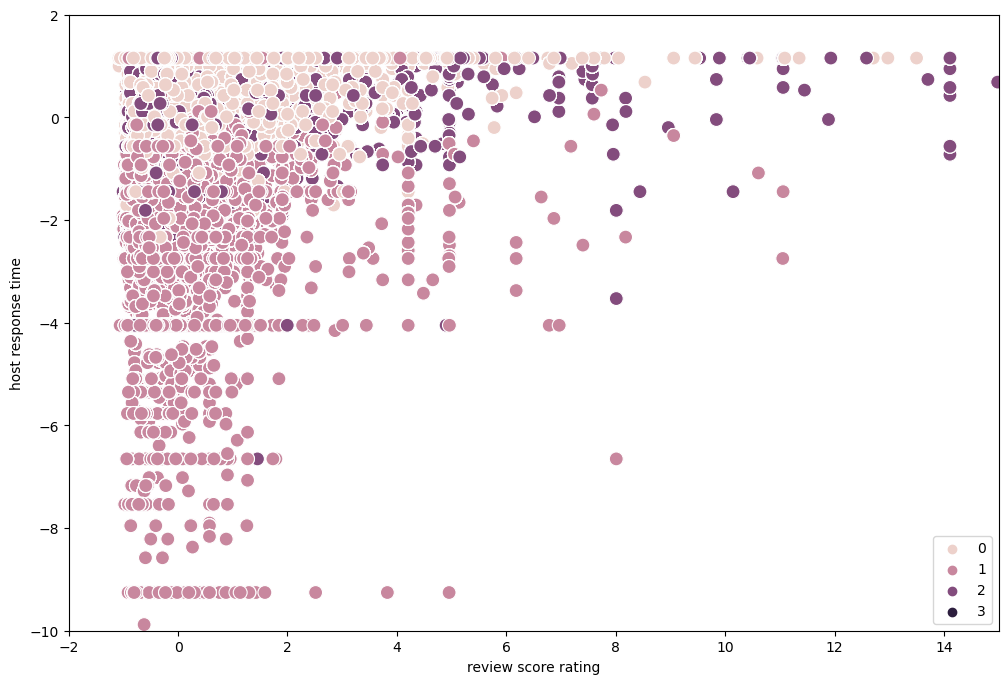

In [41]:
# Plot the clusters for the Review Rating Score and Host Acceptance Rate variable

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['price'], y=scaled_df['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.


plt.xlim(-2, 15)

# Set y-axis limit to 20
plt.ylim(-10, 2)


ax.grid(False) # This removes the grid from the background.
plt.xlabel('review score rating') # Label x-axis.
plt.ylabel('host response time') # Label y-axis.
plt.show()

#### Accommodates vs. Price

    The clusters show a separation between lower-accommodating and lower-priced listings (clusters 0 and 1) and those that accommodate more guests.
    Higher accommodation values (e.g., 10+) seem to have listings across a wider range of prices, suggesting that as the number of guests a property accommodates increases, pricing becomes more variable.
    
####  Bathrooms vs. Price

    Listings with more bathrooms are likely to have a higher price per listing, which is evident in clusters 2 and 3, particularly for listings with many bathrooms (10+).
    Clusters 0 and 1 dominate the lower end of the spectrum, showing cheaper properties tend to have fewer bathrooms.
    
#### Host Acceptance Rate vs. Review Rating

    Properties in clusters 2 and 3 tend to have a higher host acceptance rate and better review ratings, suggesting a correlation between high-performing hosts and high-end properties.
    Cluster 0, on the other hand, shows lower review ratings and acceptance rates, possibly indicating less reputable or newer hosts.
    
#### Host Response Time vs. Review Score Rating 

    A quicker host response time correlates with higher review ratings, which is notable in clusters 2 and 3.
    Slower response times are more common in cluster 0, which may contribute to lower ratings.

In [43]:
# Set pandas display option to show 2 decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

## 08. Descriptive statistics

In [45]:
scaled_df.shape

(832809, 40)

In [46]:
numerical_df.shape

(832809, 39)

In [47]:
numerical_df['clusters'] = scaled_df['clusters']

# Now, you can run the .describe() method on numerical_df
numerical_df.describe()

C:\Users\alope\AppData\Local\Temp\ipykernel_10532\2307726700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['clusters'] = scaled_df['clusters']


,reviews_in_last_year,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,min_min_nights_allowed,max_min_nights_allowed,min_max_nights_allowed,max_max_nights_allowed,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude,longitude,clusters
count,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,832809.00,746649.00
mean,20.20,7.06,93.32,88.29,7.53,40.72,-73.94,2.97,1.11,1.29,186.76,23.23,533.32,22.94,24.00,730.48,2393695.36,23.43,1959699.79,10.39,25.82,42.27,187.39,158.14,20.20,4.78,4.83,4.75,4.88,4.87,4.75,4.73,5.30,2.70,2.49,0.03,2.57,40.72,-73.94,0.71
std,55.11,13.96,17.60,19.59,77.30,0.06,0.06,1.92,0.39,0.81,163.95,22.25,21920.64,21.88,28.60,21920.64,71645542.43,23.50,62103209.82,11.61,22.26,32.93,125.11,163.90,55.11,0.19,0.17,0.23,0.14,0.16,0.20,0.19,21.11,15.72,12.89,0.25,4.09,0.06,0.06,0.88
min,0.00,1.00,0.00,0.00,1.00,40.50,-74.25,1.00,0.00,0.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.01,40.50,-74.25,0.00
25%,2.00,1.00,93.32,88.00,1.00,40.68,-73.98,2.00,1.00,1.00,99.00,3.00,60.00,3.00,4.00,90.00,120.00,3.30,100.00,0.00,3.00,10.00,77.00,50.00,2.00,4.69,4.77,4.66,4.84,4.83,4.65,4.65,1.00,0.00,0.00,0.00,0.99,40.68,-73.98,0.00
50%,10.00,1.00,100.00,96.00,2.00,40.71,-73.95,2.00,1.00,1.00,150.00,30.00,365.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,4.00,22.00,38.00,180.00,115.00,10.00,4.82,4.87,4.81,4.92,4.92,4.79,4.77,1.00,1.00,0.00,0.00,1.91,40.71,-73.95,0.00
75%,22.00,7.06,100.00,100.00,3.00,40.76,-73.92,4.00,1.00,2.00,222.00,30.00,1125.00,30.00,30.00,1125.00,1125.00,30.00,1125.00,22.00,48.00,75.00,308.00,215.00,22.00,4.91,4.93,4.91,4.96,4.97,4.90,4.85,3.00,1.00,1.00,0.00,3.06,40.76,-73.92,2.00
max,1568.00,72.00,100.00,100.00,4641.00,40.91,-73.71,16.00,15.50,15.00,7500.00,1250.00,20000000.00,1250.00,1250.00,20000000.00,2147483647.00,1250.00,2137448681.90,30.00,60.00,90.00,365.00,1915.00,1568.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,842.00,842.00,691.00,13.00,103.53,40.91,-73.71,3.00


In [48]:
# Group by 'cluster' and calculate mean and median for all columns
numerical_df.groupby('clusters').agg(['mean', 'median'])

numerical_df.to_csv('cluster_summary.csv')

In [49]:
# Group by 'cluster' and calculate mean and median for all columns
numerical_df.groupby('clusters').agg(['mean', 'median'])

reviews_in_last_year        host_response_time         \
                         mean median               mean median   
clusters                                                         
0.00                    17.52   9.00               7.24   3.00   
1.00                    17.27  10.00               6.57   1.00   
2.00                    18.47   9.00               7.45   3.00   
3.00                     0.00   0.00               7.06   7.06   

         host_response_rate        host_acceptance_rate         \
                       mean median                 mean median   
clusters                                                         
0.00                  93.31 100.00                87.70  95.00   
1.00                  93.81 100.00                88.47  96.00   
2.00                  92.87 100.00                87.46  96.00   
3.00                  93.32  93.32                88.29  88.29   

         host_listings_count        latitude        longitude         \
                        mean median     mean median      mean median   
clusters                                                               
0.00                    5.83   2.00    40.72  40.71    -73.94 -73.95   
1.00                    9.43   2.00    40.72  40.71    -73.94 -73.95   
2.00                    6.69   2.00    40.72  40.71    -73.94 -73.95   
3.00                    1.00   1.00    40.76  40.76    -73.99 -73.99   

         accommodates        bathrooms        bedrooms         price         \
                 mean median      mean median     mean median   mean median   
clusters                                                                      
0.00             2.93   2.00      1.11   1.00     1.28   1.00 183.46 149.00   
1.00             3.03   2.00      1.11   1.00     1.30   1.00 184.02 142.00   
2.00             2.94   2.00      1.11   1.00     1.27   1.00 186.92 150.00   
3.00             2.00   2.00      2.00   2.00     2.00   2.00 349.00 349.00   

         minimum_nights        maximum_nights        min_min_nights_allowed  \
                   mean median           mean median                   mean   
clusters                                                                      
0.00              24.55  30.00         569.54 365.00                  24.21   
1.00              23.07  30.00         533.62 365.00                  23.09   
2.00              23.78  30.00         516.94 365.00                  23.45   
3.00             365.00 365.00         365.00 365.00                 365.00   

                max_min_nights_allowed        min_max_nights_allowed          \
         median                   mean median                   mean  median   
clusters                                                                       
0.00      30.00                  25.34  30.00                 773.72 1125.00   
1.00      30.00                  23.88  30.00                 724.76 1125.00   
2.00      30.00                  24.15  30.00                 702.93 1125.00   
3.00     365.00                 365.00 365.00                 365.00  365.00   

         max_max_nights_allowed         minimum_nights_avg_ntm         \
                           mean  median                   mean median   
clusters                                                                
0.00                  877349.86 1125.00                  24.80  30.00   
1.00                 5606405.76 1125.00                  23.40  30.00   
2.00                 4942707.40 1125.00                  23.78  30.00   
3.00                     365.00  365.00                 365.00 365.00   

         maximum_nights_avg_ntm         availability_30         \
                           mean  median            mean median   
clusters                                                         
0.00                  626231.04 1125.00           10.10   4.00   
1.00                 5580190.80 1125.00           10.17   4.00   
2.00                 3773634.77 1125.00           10.19   4.00   
3

### Cluster Summary
Cluster 0: Budget-friendly listings with lower prices and moderate review counts, appealing to budget-conscious travelers.

Cluster 1: High-volume, low-priced listings with a large number of reviews and high turnover, likely catering to frequent short-term bookings.

Cluster 2: Mid-range priced listings with fewer reviews, attracting guests who prefer a balance between cost and comfort.

Cluster 3: Higher-priced listings with moderate reviews, potentially catering to a more exclusive market with longer stays and less frequent bookings.